In [1]:
# 1 Install necessary libraries (uncomment & run once)
!pip install pandas numpy nltk scikit-learn seaborn matplotlib

In [2]:

# 2 Imports
import numpy as np
import pandas as pd
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# 3 Load datasets
fake_df = pd.read_csv(r"C:\Users\Asus\Downloads\Fake.csv")
real_df = pd.read_csv(r"C:\Users\Asus\Downloads\True.csv")


In [4]:
fake_df['label'] = 0  # 0 means FAKE
real_df['label'] = 1  # 1 means REAL

In [5]:
#  Combine the Datasets
df = pd.concat([fake_df, real_df])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the data

In [6]:
# 4️⃣ Text cleaning function
stop = set(stopwords.words('english'))
def clean(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([w for w in text.split() if w not in stop])

In [7]:
# Apply cleaning
df['clean_text'] = df['text'].apply(clean)

In [8]:
print("Before Cleaning:")
print(df['text'][0])



Before Cleaning:
21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocative statements on Judge Jeanine Pirro s show recently. While discussing the halt that was imposed on President Trump s Executive Order on travel. Stein referred to the judgement by the 9th Circuit Court in Washington state as a  Coup d tat against the executive branch and against the constitution.  Stein went on to call the Judges in Seattle  political puppets  and the judiciary  political pawns. Watch the interview below for the complete statements and note the stark contrast to the rhetoric of the leftist media and pundits who neglect to note that no court has ever blocked any Presidential orders in immigration in the past or discuss the legal efficacy of the halt or the actual text of the Executive Order.READ MORE TRUMP NEWS AT: 21st Century Wire Trump FilesSUPPORT OUR WORK 

In [9]:
print("\nAfter Cleaning:")
print(df['clean_text'][0])


After Cleaning:
21st century wire says ben stein reputable professor pepperdine university also hollywood fame appearing tv shows films ferris bueller day made provocative statements judge jeanine pirro show recently discussing halt imposed president trump executive order travel stein referred judgement 9th circuit court washington state coup tat executive branch constitution stein went call judges seattle political puppets judiciary political pawns watch interview complete statements note stark contrast rhetoric leftist media pundits neglect note court ever blocked presidential orders immigration past discuss legal efficacy halt actual text executive orderread trump news 21st century wire trump filessupport work subscribing becoming member 21wiretv


In [10]:
# 5️⃣ Train-test split
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# 6️⃣ TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
# 7️⃣ Train model
model = LogisticRegression()
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
# 8️⃣ Evaluate the model
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9814031180400891
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4710
           1       0.98      0.98      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



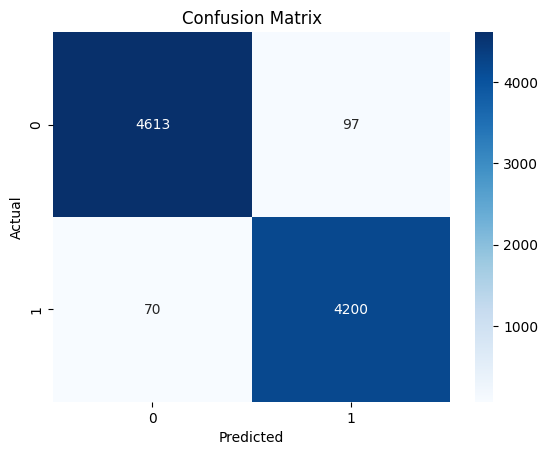

In [14]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# 9️⃣ Save model and vectorizer
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [16]:
# 🔟 Predict from dataset 
idx = 30  # or any index you choose
print("\n📰 Article (raw text):")
print(df['text'].iloc[idx])  # shows the original text from df


📰 Article (raw text):
WASHINGTON (Reuters) - Satellite images taken this month of a North Korean naval shipyard indicate Pyongyang is pursuing an  aggressive schedule  to build its first operational ballistic missile submarine, a U.S. institute reported on Thursday. Washington-based 38 North, a North Korea monitoring project,  cited images taken on Nov. 5 showing activity at North Korea s Sinpo South Shipyard.  The presence of what appear to be sections of a submarine s pressure hull in the yards suggests construction of a new submarine, possibly the SINPO-C ballistic missile submarine - the follow-on to the current SINPO-class experimental ballistic missile submarine,  38 North said in a report. The report said that throughout 2017 there had been continued movement of parts and components into and out of two parts yards adjacent to the constructions halls in the center of the shipyard. It said the Nov. 5 images showed two large circular objects that could be sections of a submarine s

In [17]:

# Predict using cleaned & vectorized version
cleaned = df['clean_text'].iloc[idx]
vect = vectorizer.transform([cleaned])
pred = model.predict(vect)
print("\n🔎 Prediction:", "REAL" if pred[0] == 1 else "FAKE")


🔎 Prediction: REAL


In [18]:
print(df.head())

                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  \
0    February 13, 2017      0   
1       April 5, 2017       1   
2  September 27, 2017       1   
3         May 22, 2017      0   
4       June 24, 2016       1   

                                          c

In [19]:
print(df['label'].value_counts())

label
0    23481
1    21417
Name: count, dtype: int64


In [20]:
# Show a sample real news article
print(" Sample Real News Article:")
print(real_df['text'][10])  

 Sample Real News Article:
(Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. Moore declined to concede defeat even after Tru

In [21]:
# Show a sample fake news article
print(" Sample Fake News Article:")d
print(fake_df['text'][10]) 

 Sample Fake News Article:
A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder Jo

In [22]:
!pip --version


pip 25.1.1 from C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip (python 3.13)



In [23]:
# Function to clean new input article
def clean_new_input(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([w for w in text.split() if w not in stop])

In [24]:
def predict_article(text):
    cleaned = clean_new_input(text)
    vect = vectorizer.transform([cleaned])

    if vect.nnz == 0:
        print("⚠️ The model could not understand this article. Try a longer one.")
        return

    prediction = model.predict(vect)[0]
    confidence = model.predict_proba(vect)[0][prediction]
    label = "REAL" if prediction == 1 else "FAKE"

    print("\n🧾 New Article Prediction")
    print("Label:", label)
    print("Confidence:", f"{round(confidence * 100, 2)}%")

    